# Optimal Route Trip

In [37]:
# Install required libraries
!pip install geopy networkx



In [38]:
# Create a dictionary of landmarks with their coordinates
data = {
    "Landmark": [
        "Statue of Liberty",
        "Grand Canyon",
        "Mount Rushmore",
        "Yellowstone",
        "Golden Gate Bridge",
        "Space Needle",
        "Walt Disney World",
        "opera"
    ],
    "Latitude": [40.6892, 36.1069, 43.8791, 44.4280, 37.8199, 47.6205, 28.3852, -33.8567844],
    "Longitude": [-74.0445, -112.1129, -103.4591, -110.5885, -122.4783, -122.3493, -81.5639, 151.2152967]
}

# Convert the data into a DataFrame
landmarks = pd.DataFrame(data)

# Display the dataset
print(landmarks)

# Save the dataset to a CSV file (optional)
landmarks.to_csv('landmarks.csv', index=False)

             Landmark   Latitude   Longitude
0   Statue of Liberty  40.689200  -74.044500
1        Grand Canyon  36.106900 -112.112900
2      Mount Rushmore  43.879100 -103.459100
3         Yellowstone  44.428000 -110.588500
4  Golden Gate Bridge  37.819900 -122.478300
5        Space Needle  47.620500 -122.349300
6   Walt Disney World  28.385200  -81.563900
7               opera -33.856784  151.215297


In [39]:
!pip install geopy haversine networkx matplotlib

In [40]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic  # To calculate distances
import networkx as nx  # For TSP solving
import matplotlib.pyplot as plt
from itertools import permutations

In [41]:
# Load the landmarks dataset
data = {
    "Landmark": ["Statue of Liberty", "Grand Canyon", "Mount Rushmore", "Yellowstone", "Golden Gate Bridge", "Space Needle", "Walt Disney World"],
    "Latitude": [40.6892, 36.1069, 43.8791, 44.4280, 37.8199, 47.6205, 28.3852],
    "Longitude": [-74.0445, -112.1129, -103.4591, -110.5885, -122.4783, -122.3493, -81.5639]
}

landmarks = pd.DataFrame(data)

# Calculate the distance matrix
num_landmarks = len(landmarks)
distances = np.zeros((num_landmarks, num_landmarks))

for i in range(num_landmarks):
    for j in range(num_landmarks):
        loc1 = (landmarks.iloc[i]['Latitude'], landmarks.iloc[i]['Longitude'])
        loc2 = (landmarks.iloc[j]['Latitude'], landmarks.iloc[j]['Longitude'])
        distances[i, j] = geodesic(loc1, loc2).miles  # Distance in miles

# Display the distance matrix
distances_df = pd.DataFrame(distances, columns=landmarks['Landmark'], index=landmarks['Landmark'])
print(distances_df)

Landmark            Statue of Liberty  Grand Canyon  Mount Rushmore  \
Landmark                                                              
Statue of Liberty            0.000000   2073.943098     1515.345580   
Grand Canyon              2073.943098      0.000000      705.168919   
Mount Rushmore            1515.345580    705.168919        0.000000   
Yellowstone               1866.778672    579.726562      356.301145   
Golden Gate Bridge        2572.262968    585.280701     1077.511738   
Space Needle              2407.852549    952.251326      946.484250   
Walt Disney World          949.466345   1857.567556     1615.760026   

Landmark            Yellowstone  Golden Gate Bridge  Space Needle  \
Landmark                                                            
Statue of Liberty   1866.778672         2572.262968   2407.852549   
Grand Canyon         579.726562          585.280701    952.251326   
Mount Rushmore       356.301145         1077.511738    946.484250   
Yellowstone    

In [42]:
from networkx.algorithms.approximation import traveling_salesman_problem

# Create a graph
G = nx.Graph()

# Add nodes and weighted edges
for i in range(num_landmarks):
    for j in range(i + 1, num_landmarks):
        G.add_edge(i, j, weight=distances[i, j])

# Solve TSP
tsp_path = traveling_salesman_problem(G, weight='weight')

# Display results
optimal_landmarks = [landmarks.iloc[i]['Landmark'] for i in tsp_path]
print("Optimal Route:", " -> ".join(optimal_landmarks))

Optimal Route: Statue of Liberty -> Mount Rushmore -> Yellowstone -> Space Needle -> Golden Gate Bridge -> Grand Canyon -> Walt Disney World -> Statue of Liberty


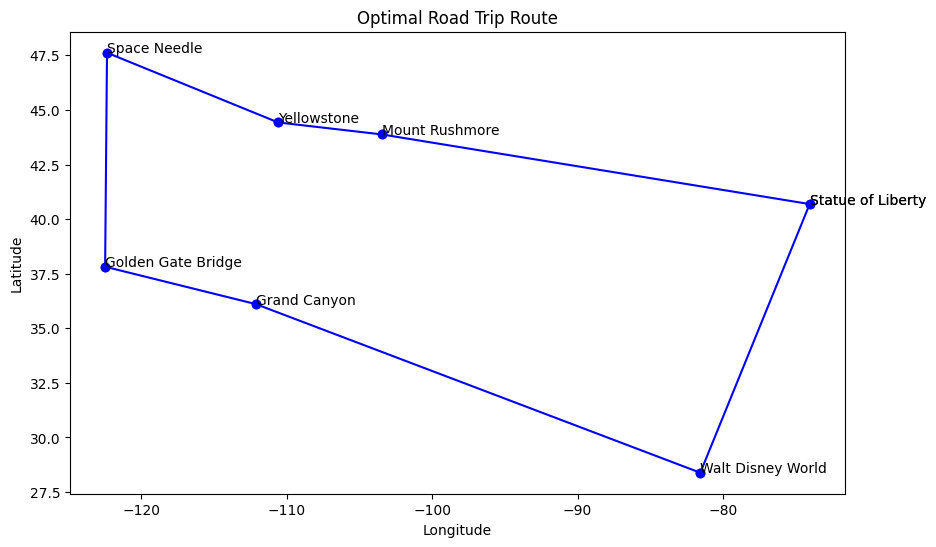

In [43]:
# Get coordinates for the optimal route
route_coords = [(landmarks.iloc[i]['Latitude'], landmarks.iloc[i]['Longitude']) for i in tsp_path]

# Plot the route
plt.figure(figsize=(10, 6))
for i in range(len(route_coords) - 1):
    plt.plot([route_coords[i][1], route_coords[i + 1][1]],
             [route_coords[i][0], route_coords[i + 1][0]], 'b-o')

# Add labels
for i, coord in enumerate(route_coords):
    plt.text(coord[1], coord[0], landmarks.iloc[tsp_path[i]]['Landmark'], fontsize=10)

plt.title("Optimal Road Trip Route")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [46]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Example landmarks DataFrame (replace with your actual data)
landmarks = pd.DataFrame({
   "Landmark": ["Statue of Liberty", "Grand Canyon", "Mount Rushmore", "Yellowstone", "Golden Gate Bridge", "Space Needle", "Walt Disney World"],
    "Latitude": [40.6892, 36.1069, 43.8791, 44.4280, 37.8199, 47.6205, 28.3852],
    "Longitude": [-74.0445, -112.1129, -103.4591, -110.5885, -122.4783, -122.3493, -81.5639]
})

# Assuming tsp_path gives the optimal route (this should be a list of indices of landmarks)
tsp_path = [0, 1, 3, 2]  # Example path

# Create a map centered around the average coordinates of the landmarks
avg_lat = landmarks['Latitude'].mean()
avg_lon = landmarks['Longitude'].mean()
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Add markers for each landmark
marker_cluster = MarkerCluster().add_to(m)
for i in range(len(landmarks)):
    folium.Marker(
        location=[landmarks.iloc[i]['Latitude'], landmarks.iloc[i]['Longitude']],
        popup=landmarks.iloc[i]['Landmark']
    ).add_to(marker_cluster)

# Plot the optimal route on the map
route_coords = [(landmarks.iloc[i]['Latitude'], landmarks.iloc[i]['Longitude']) for i in tsp_path]

# Adding the route as a polyline
folium.PolyLine(route_coords, color="blue", weight=2.5, opacity=1).add_to(m)

# Add labels on the map at each landmark
for i, coord in enumerate(route_coords):
    folium.Marker(
        location=coord,
        icon=folium.DivIcon(icon_size=(150, 36), icon_anchor=(7, 20), html=f'<div>{landmarks.iloc[tsp_path[i]]["Landmark"]}</div>')
    ).add_to(m)

# Display the map directly in Google Colab
display(m)